In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("E:\PES\SEM2\Refer\ML\ML_Datasets-20230613T052137Z-001\ML_Datasets\Housing.csv")

In [112]:
df.head()


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [114]:
df.isna().sum()

Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le = LabelEncoder()

In [117]:
cols = ["driveway","recroom","fullbase","gashw","airco","prefarea"]
for f in cols:
    df[f] = le.fit_transform(df[f])
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
x = df.loc[:,df.columns!="price"]
y = df["price"]

In [120]:
poly = PolynomialFeatures(degree=2)

In [121]:
xpoly = poly.fit_transform(x)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
from sklearn.linear_model import LinearRegression

In [147]:
xtrain,xtest,ytrain,ytest = train_test_split(xpoly,y,test_size=0.2,random_state=1)

In [148]:
regressor = LinearRegression()

In [149]:
pr = regressor.fit(xtrain,ytrain)

In [150]:
print("Intercept :",pr.intercept_,"Co-efficient :",pr.coef_)

Intercept : -67094958090.45498 Co-efficient : [ 6.70949941e+10  4.72645689e+01  1.52720456e+01 -8.70962634e+03
 -1.32705320e+05  6.14876570e+04 -6.63253974e+02  2.92974017e+04
  1.31973328e+04 -3.97156118e+02 -1.55833791e+04  2.77514500e+03
  1.05075184e+04  5.70804201e-02 -8.69672077e-03  9.62793142e+00
  5.81581851e+01 -6.05643275e+00 -1.04583453e+02  3.71767423e+01
 -4.09257152e+01 -8.24162480e+01 -6.99405845e+00  1.00013617e+00
 -1.23703583e+02 -4.51411520e-04  9.42705050e-01  1.06540694e+00
 -2.58361230e+00 -6.44159155e+00  9.55501808e+00 -4.75390127e+00
  5.21451158e+00  1.30449011e+00  1.02012819e+00  8.04856928e+00
 -2.09421433e+03  1.00414250e+04 -1.34339565e+03  9.90662127e+03
 -3.31726736e+04  1.10294392e+04 -4.83464498e+03  8.93525654e+03
 -4.70379133e+03 -5.03521825e+03  2.92000119e+04 -8.14212698e+03
  6.24759742e+03 -9.64057333e+02  8.77140864e+03 -1.55591498e+04
  2.74779193e+04 -9.45487206e+03 -2.62625265e+04 -6.48772467e+03
  5.20771664e+03 -8.40352410e+03 -9.78304043

In [151]:
from sklearn.metrics import mean_absolute_error , r2_score

In [152]:
from sklearn.metrics import mean_squared_error

In [153]:
import math

In [154]:
ypred = pr.predict(xtest)

In [155]:
ypred

array([ 28783.75448608,  60722.46401978,  78244.67028809,  73716.35185242,
        30400.81032562,  77093.84298706,  27604.98194885,  33937.91520691,
        60709.04259491, 105453.3318634 ,  66935.64099121,  85963.94422913,
        18302.30297852,  88467.88709259,  47244.65142059,  86924.03035736,
        41770.84192657,  47073.441185  ,  94562.49141693,  83980.15813446,
        39654.74816132,  61365.67459869,  83161.45709991,  93904.64170074,
        89652.2973175 ,  39014.06654358,  29587.79655457,  41333.66374969,
        56134.25480652, 111071.5120163 ,  77198.65384674,  49312.10410309,
        96845.16995239,  67217.42189026,  62407.93561554,  75756.13069916,
        91102.00675964,  59633.53798676,  90437.84468842,  62687.42740631,
        55882.97515106,  28124.19033813,  48523.46944427,  60384.33922577,
        59481.40878296,  77161.08436584,  53515.05567169,  77342.44342041,
        84703.30659485,  47002.35127258,  31623.19841003,  69329.80649567,
        53603.00539398, 1

In [156]:
accuracy = r2_score(ytest,ypred)

In [157]:
error = mean_squared_error(ytest,ypred)

In [158]:
print("\t Accuracy = ",accuracy)

	 Accuracy =  -0.22087183021316537


In [159]:
print("\t RMSE = ",math.sqrt(error))

	 RMSE =  29812.033510669913


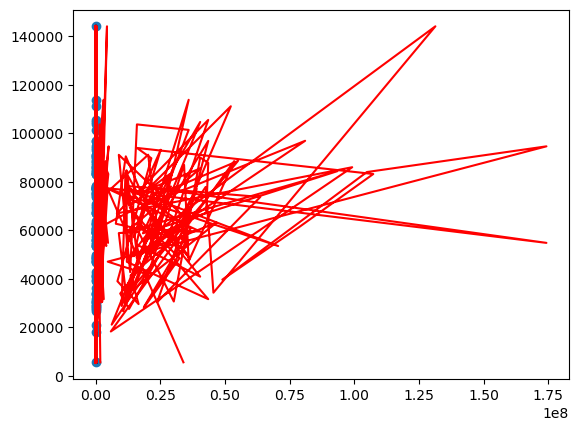

In [161]:
plt.scatter(ytest,ypred)
plt.plot(xtest,ypred,color="red")
plt.show()